# Prog6280c - Video Game Sales

In [2]:
%pip install pandas seaborn matplotlib -q
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
df = pd.read_csv('../data/video_game_sales.csv')
df.columns = df.columns.str.strip()
df = df.dropna()
df

,index,Rank,Game Title,Platform,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Review
0,0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,40.43,28.39,3.77,8.54,81.12,76.28
1,1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,91.00
2,2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,14.50,12.22,3.63,3.21,33.55,82.07
3,3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,14.82,10.51,3.18,3.01,31.52,82.65
4,4,5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,88.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1902,1902,1903,Lizzie McGuire 2: Lizzie Diaries,GBA,2004.0,Action,Disney Interactive Studios,0.60,0.22,0.00,0.01,0.83,55.00
1903,1903,1904,Xenoblade Chronicles,Wii,2010.0,Role-Playing,Nintendo,0.39,0.22,0.16,0.07,0.83,91.74
1904,1904,1905,SingStar Abba,PS3,2008.0,Misc,Sony Computer Entertainment,0.25,0.44,0.00,0.14,0.83,73.00
1905,1905,1906,FIFA Soccer World Championship,PS2,2000.0,Sports,Electronic Arts,0.27,0.21,0.28,0.07,0.83,73.00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1878 entries, 0 to 1906
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          1878 non-null   int64  
 1   Rank           1878 non-null   int64  
 2   Game Title     1878 non-null   object 
 3   Platform       1878 non-null   object 
 4   Year           1878 non-null   float64
 5   Genre          1878 non-null   object 
 6   Publisher      1878 non-null   object 
 7   North America  1878 non-null   float64
 8   Europe         1878 non-null   float64
 9   Japan          1878 non-null   float64
 10  Rest of World  1878 non-null   float64
 11  Global         1878 non-null   float64
 12  Review         1878 non-null   float64
dtypes: float64(7), int64(2), object(4)
memory usage: 205.4+ KB


## Task 1: Sales Analysis by Region

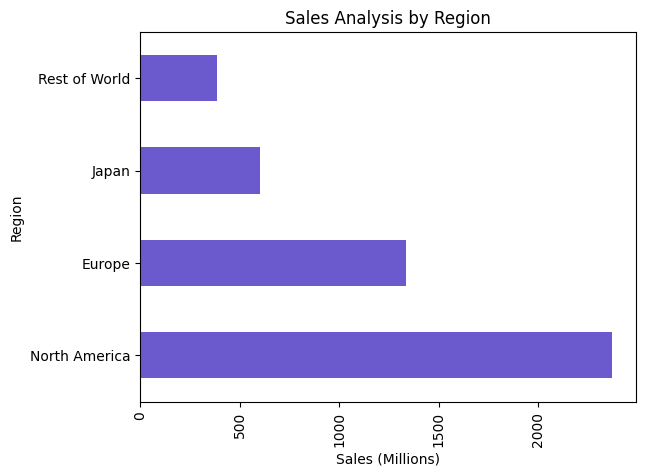

In [5]:
df[['North America', 'Europe', 'Japan', 'Rest of World']].sum().plot(kind='barh', color='slateblue')
plt.title('Sales Analysis by Region')
plt.ylabel('Region')
plt.xlabel('Sales (Millions)')
plt.xticks(rotation=90)
plt.show()

North America has the most amount of sales while the rest of the world has the least.

## Task 2: Trends Over Time

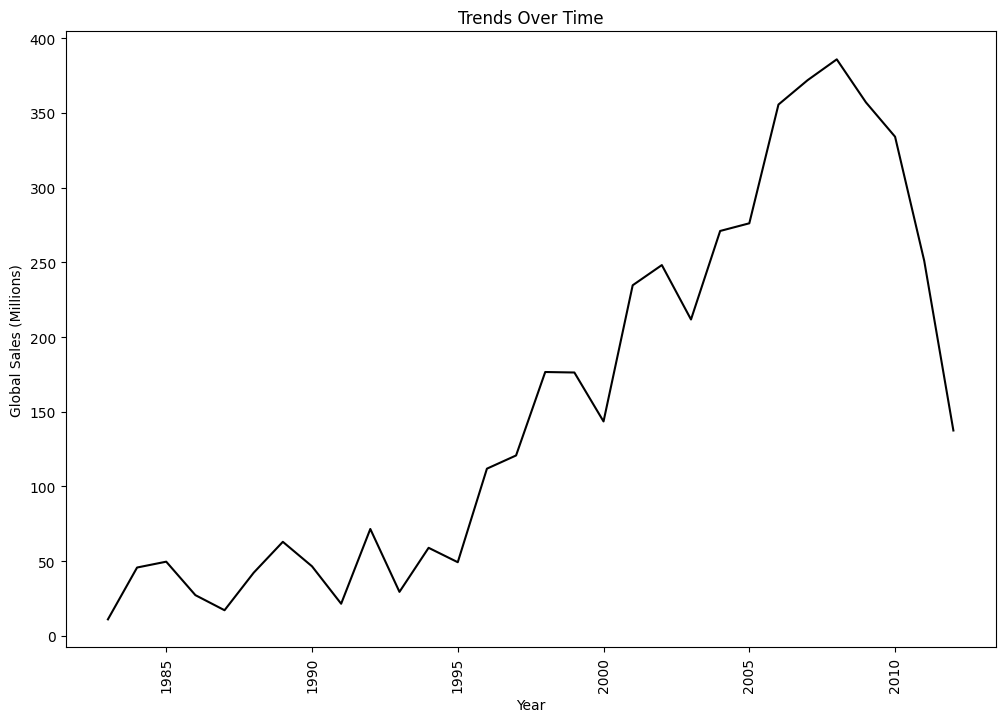

In [6]:
info = df.groupby('Year')['Global'].sum()
plt.figure(figsize=(12, 8))
info.plot(kind='line', color='black')
plt.title('Trends Over Time')
plt.ylabel('Global Sales (Millions)')
plt.xlabel('Year')
plt.xticks(rotation=90)
plt.show()

Global sales rose and peaked at aroun 2007 where it dropped entirely.

## Task 3: Platform Popularity

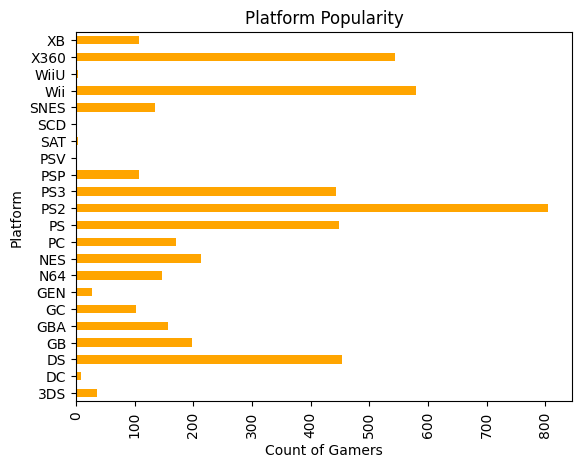

In [7]:
info = df.groupby('Platform')['Global'].sum().plot(kind='barh', color='orange')
plt.title('Platform Popularity')
plt.ylabel('Platform')
plt.xlabel('Count of Gamers')
plt.xticks(rotation=90)
plt.show()


The console with the most gamers is the PS2.

## Task 4: Genre Analysis

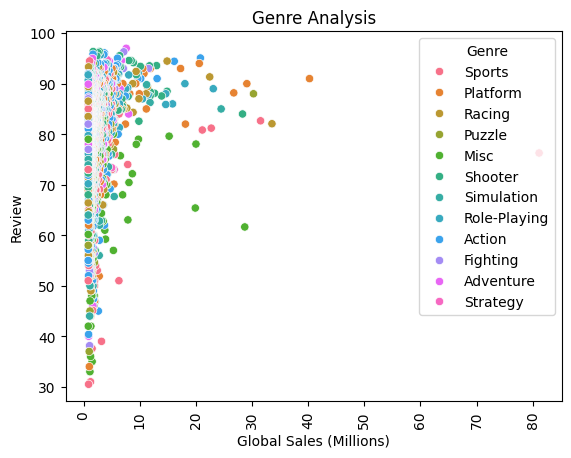

In [8]:
sns.scatterplot(x='Global', y='Review', data=df, hue=df['Genre'])
plt.title('Genre Analysis')
plt.ylabel('Review')
plt.xlabel('Global Sales (Millions)')
plt.xticks(rotation=90)
plt.show()


One sports game have the most amount of global sales compared to all the other games which only have around 1 million sales or less.

## Task 5: Publisher Performance:

Text(0.5, 1.0, 'Publisher Performance')

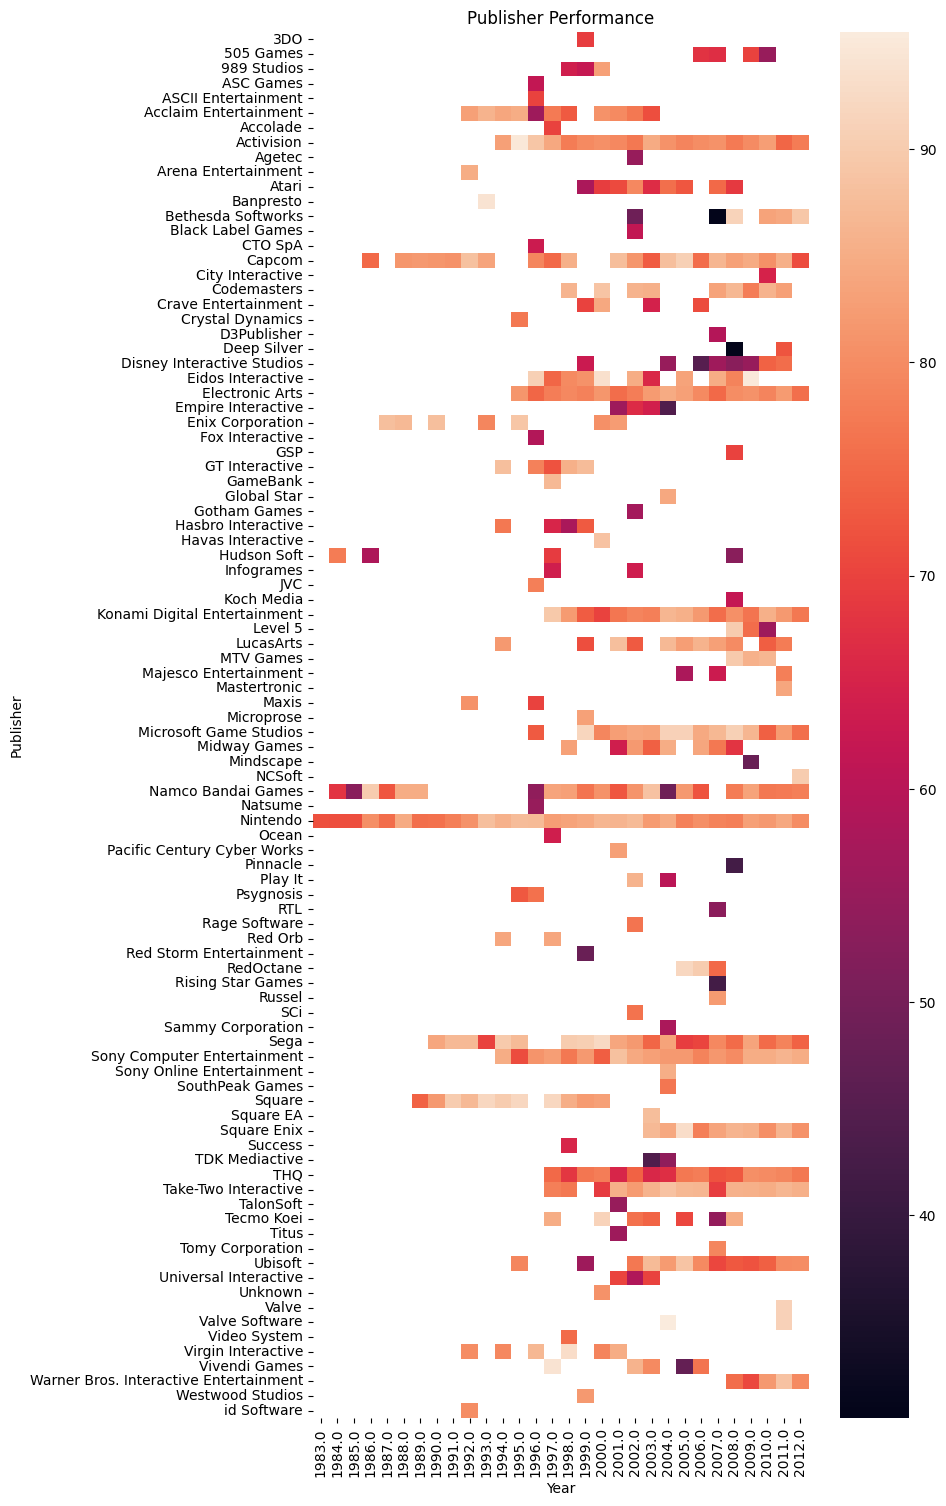

In [12]:
plt.figure(figsize=(8,18))
sns.heatmap(df.pivot_table(index='Publisher', columns='Year', values='Review'))
plt.title("Publisher Performance")

Nintendo has made games in all years with high reviews for all of them, while other publishers have only few years.